## Course Project: Classification with Custom Dataset & Model Exploration  


### Part 1: Dataset Selection and Exploration

**Dataset Link and Image as required:**

https://www.kaggle.com/datasets/obeykhadija/drug-consumptions-uci

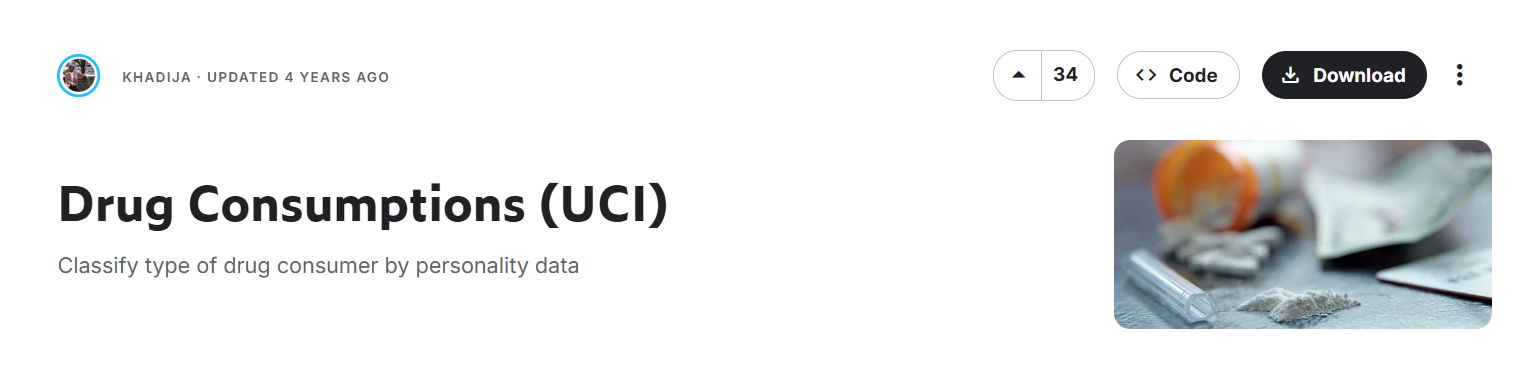

#### 1.1. Dataset Overview

This dataset contains responses from 1,885 individuals regarding their personality traits, demographics, and drug usage history. Each participant is described by 12 features and their usage of 18 substances (legal and illegal), including a fake drug ("Semeron") used to detect over-claiming.

- **Target Feature (for this project):** Cannabis usage
- **Number of Classes:** 7 (from "Never Used" to "Used in Last Day")
- **Features Include:**
  - **Demographics:** Age, Gender, Education, Country, Ethnicity
  - **Personality Traits:** Neuroticism (Nscore), Extraversion (Escore), Openness (Oscore), Agreeableness (Ascore), Conscientiousness (Cscore)
  - **Behavioral Scores:** Impulsiveness (BIS-11), Sensation Seeking (ImpSS)

#### 1.2. Why This Dataset?

We selected this dataset because drug use is a relevant topic with public health implications. It allows us to explore how psychological and demographic factors relate to consumption patterns.

From a machine learning perspective:
- It is a **multi-class classification** problem
- The data is **imbalanced** (some classes like "Never Used" or "Used in Last Day" dominate)
- It offers rich, real-world data for experimentation with preprocessing, feature engineering, and model evaluation

#### 1.3. Why is it Imbalanced?

The target variable (`Cannabis`) shows uneven distribution — for example, many participants fall into "CL6" (Used in Last Day) or "CL0" (Never Used), while few are in the intermediate categories.

Each drug is treated as a separate **multi-class classification problem** with **7 usage levels**:
- `CL0`: Never Used  
- `CL1`: Used over a Decade Ago  
- `CL2`: Used in Last Decade  
- `CL3`: Used in Last Year  
- `CL4`: Used in Last Month  
- `CL5`: Used in Last Week  
- `CL6`: Used in Last Day  


#### 1.4. Explore Data
**Use functions that you find helpful to explore the data.**

In [14]:
import pandas as pd

#1 - Load the dataset
df = pd.read_csv('Drug_Consumption.csv')

#2 - Head to display the 5 first lines
display(df.head())

#3 - Get the overview of dataset
display(df.info())

#4 - Get the basic statistic information
display(df.describe())

#5 - Get the unique values of categorical columns
for col in ['Age', 'Gender', 'Education', 'Country', 'Ethnicity']:
    print(f"{col}: {df[col].unique()}")

#6 - Count how many times each level of Cannabis use appears
display(df['Cannabis'].value_counts().sort_index())

#7 - Get the percentage of each class in the column 'Cannabis' (Check the Class Imbalance)
display(df['Cannabis'].value_counts(normalize=True)*100)



,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,2,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,3,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,4,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,5,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,6,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1884 non-null   int64  
 1   Age        1884 non-null   object 
 2   Gender     1884 non-null   object 
 3   Education  1884 non-null   object 
 4   Country    1884 non-null   object 
 5   Ethnicity  1884 non-null   object 
 6   Nscore     1884 non-null   float64
 7   Escore     1884 non-null   float64
 8   Oscore     1884 non-null   float64
 9   AScore     1884 non-null   float64
 10  Cscore     1884 non-null   float64
 11  Impulsive  1884 non-null   float64
 12  SS         1884 non-null   float64
 13  Alcohol    1884 non-null   object 
 14  Amphet     1884 non-null   object 
 15  Amyl       1884 non-null   object 
 16  Benzos     1884 non-null   object 
 17  Caff       1884 non-null   object 
 18  Cannabis   1884 non-null   object 
 19  Choc       1884 non-null   object 
 20  Coke    

None

,ID,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS
count,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000
mean,945.796178,-0.000119,0.000143,-0.000225,0.000242,-0.000383,0.007335,-0.002667
std,544.877779,0.998345,0.997625,0.996402,0.997481,0.997787,0.954674,0.963575
min,2.000000,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,474.750000,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,946.500000,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1417.250000,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


Age: ['25-34' '35-44' '18-24' '65+' '45-54' '55-64']
Gender: ['M' 'F']
Education: ['Doctorate degree' 'Professional certificate/ diploma' 'Masters degree'
 'Left school at 18 years' 'Left school at 16 years' 'University degree'
 'Some college or university, no certificate or degree'
 'Left school before 16 years' 'Left school at 17 years']
Country: ['UK' 'Canada' 'USA' 'Other' 'Australia' 'Republic of Ireland'
 'New Zealand']
Ethnicity: ['White' 'Other' 'Mixed-White/Black' 'Asian' 'Mixed-White/Asian' 'Black'
 'Mixed-Black/Asian']


Cannabis
CL0    412
CL1    207
CL2    266
CL3    211
CL4    140
CL5    185
CL6    463
Name: count, dtype: int64

Cannabis
CL6    24.575372
CL0    21.868365
CL2    14.118896
CL3    11.199575
CL1    10.987261
CL5     9.819533
CL4     7.430998
Name: proportion, dtype: float64

**Based on the initial data exploration, we can extract the following insights:**
1. Dataset Dimensions and Structure
    - The dataset contains **1,884 rows** and **32 columns**.
    - Each row represents a respondent.
    - There are **24 categorical features** (object type) and **7 numerical features**, plus the `ID` column.
2. No Missing Values
    - All columns are fully populated, with **no missing data**, which simplifies preprocessing.
3. Age, Gender, and Demographics
    - `Age` is currently a **categorical** feature with the following groups:  
        `'18-24'`, `'25-34'`, `'35-44'`, `'45-54'`, `'55-64'`, `'65+'`.
    - `Gender` has two categories: `'M'` and `'F'`.
    - `Education` is detailed with **9 different levels**, from "Left school before 16 years" to "Doctorate degree".
    - The dataset includes various countries, mainly `'UK'`, `'Canada'`, `'USA'`, and `'Australia'`.
    - `Ethnicity` includes a mix of categories like `'White'`, `'Asian'`, `'Mixed'`, `'Black'`, and `'Other'`.
4. Personality and Psychological Traits
    - The personality features (`Nscore`, `Escore`, `Oscore`, `AScore`, `Cscore`, `Impulsive`, `SS`) are **standardized** real numbers (mean near 0, std ~1), so no scaling is needed.
    - These scores represent psychological dimensions such as Neuroticism, Extraversion, Conscientiousness, and Sensation Seeking.
5. Target Variable – Cannabis Usage
    - The `Cannabis` column is our classification target. It contains **7 different classes**, indicating frequency of use:  
    CL0 = Never Used → 412 users  
    CL1 = Over a Decade Ago → 207 users  
    CL2 = In Last Decade → 266 users  
    CL3 = In Last Year → 211 users  
    CL4 = In Last Month → 140 users  
    CL5 = In Last Week → 185 users  
    CL6 = In Last Day → 463 users  
6. Class Imbalance
    - The distribution of `Cannabis` usage is **not balanced**:
    - `CL6` (Used in Last Day) has the highest count: 463.
    - `CL0` (Never Used) also has a high count: 412.
    - Other classes have significantly fewer entries, such as `CL4` (140) or `CL1` (207).
    - This **class imbalance** may affect model performance, so metrics like **F1-score** and **confusion matrix** will be important

**Create simple plots using matplotlib or seaborn**

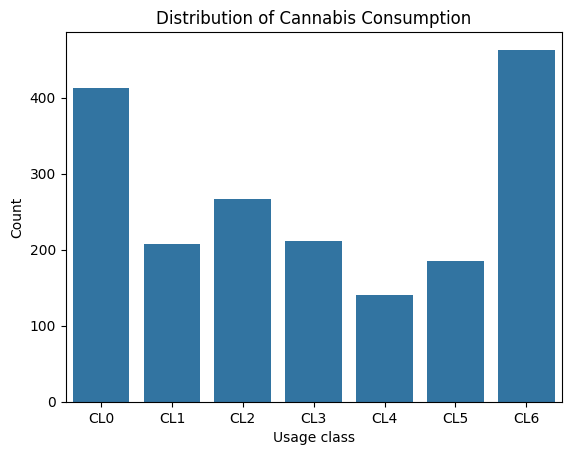

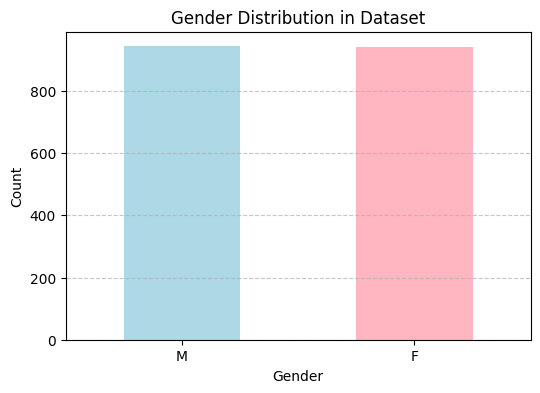

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

#8- Plot the distribution of Cannabis usage classes
sns.countplot(data=df, x='Cannabis', order= sorted(df['Cannabis'].unique()))
plt.title('Distribution of Cannabis Consumption')
plt.xlabel('Usage class')
plt.ylabel('Count')
plt.show()

# Plot Gender distribution on dataset
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(6,4))
gender_counts.plot(kind='bar', color=['lightblue', 'lightpink'])
plt.title('Gender Distribution in Dataset')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keeps labels horizontal (M/F)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Justify your exploration steps in details:**
- **Why did you choose to examine them in the way shown in the notebook?**
  We started by checking the structure of the dataset (`.info()`, `.head()`, `.value_counts()`), which is a standard first step in any data science project. It helps to quickly understand:
  - The number of samples and features
  - The types of variables (numerical or categorical)
  - Whether there are any missing values
  - The nature of the target variable (`Cannabis`) and its class distribution

  After that, I used `value_counts()` and a `countplot` to explore the class balance in the target column. Since the target is a multi-class variable, it’s essential to understand whether the data is balanced or not, as this affects the choice of evaluation metrics and model strategies.

- **How do you interpret the results, and why are they helpful for your subsequent model development?** 
  From the exploration:
    - The dataset is clean, with no missing values, which simplifies preprocessing.
    - The `Cannabis` variable is clearly imbalanced. The majority of respondents either used Cannabis in the last day (`CL6`) or never used it (`CL0`), while other categories have much fewer samples.
    - This imbalance means I cannot rely only on accuracy as an evaluation metric. 
    - Understanding the categorical variables (such as age groups, education levels, and gender) is also crucial, as they might have significant influence on drug use behavior. These will be transformed appropriately during feature engineering.


### Part 2: Data Preprocessing & Feature Engineering – 20% 

#### 2.1. Data Cleaning 
- **Clearly list all the data issues you found in the dataset.**
    1. Redundant Column: ID is just a record identifier. It does not carry any information useful for prediction.
    2. Incorrect Data Types:
        Several columns are stored as object type instead of category, including:
            - Age, Gender, Education, Country, Ethnicity
            - All drug usage columns (from Alcohol to VSA)

    3. Non-Descriptive Labels in Target and Features
        - Drug usage levels are coded as CL0, CL1, ..., CL6 — hard to interpret.
        - Not suitable for modeling unless converted.

    4. Inconsistent Column Naming
        - AScore uses a capital “A” while the rest use lowercase, like Nscore, Oscore, etc. May cause errors or inconsistencies in later analysis.

    5. No Missing Values
        - No column contains missing data.

    6. Class Imbalance in Target
        - The Cannabis column has highly uneven distribution.
        - For example, CL6 and CL0 appear much more often than others.

- **Address the issues correctly.**

In [3]:
#9- Drop Redundant Column
df.drop(columns=['ID'], inplace=True)

#10- Convert Data Types to Category
categorical_cols=['Age', 'Gender', 'Education', 'Country', 'Ethnicity']
for col in categorical_cols:
    df[col]= df[col].astype('category')

#11 - Map Drug Labels to Numeric Values
drug_map = {
    'CL0':0, 'CL1':1, 'CL2':2,
    'CL3':3, 'CL4':4, 'CL5': 5, 'CL6':6}

drug_columns = df.columns[13:] #select all columns from position 13 to the end
for col in drug_columns:
    df[col] = df[col].map(drug_map)

#12- Change the Column Name
df.rename(columns={'AScore': 'Ascore'}, inplace = True)

#13 - Make sure there is NO missing values
df.isnull().sum().sum()


0

#### 2.2. Feature Engineering 
- **Modify or Add at least 3 features.** 

In [4]:
#14 - Define and ordered mapping for age ranges and create a AgeGroup feature.
age_map = {
    '18-24':1,
    '25-34':2,
    '35-44':3,
    '45-54':4,
    '55-64':5,
    '65+':6
}
df['AgeGroup'] = df['Age'].map(age_map)

#15 - Creating a Binary Feature: High_Impulsive Feature
imp_median = df['Impulsive'].median()
df['High_Impulsive'] = (df['Impulsive'] > imp_median).astype(int)

#16 - Creating a Feature: Overall_Personality_Profile
df['Overall_Personality_Profile'] = df[['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore']].mean(axis=1) #Note: `axis=1` means the operation is performed row-wise

display(df[['AgeGroup','High_Impulsive','Overall_Personality_Profile']].head())


,AgeGroup,High_Impulsive,Overall_Personality_Profile
0,2,0,0.662826
1,3,0,-0.628948
2,1,0,0.040212
3,3,0,-0.069058
4,6,0,0.227362


- **Justify your feature engineering thought process.**
    1. **Grouping Age into Ordinal Categories (Ordinal Encoding)**  
        The `Age` column in the dataset is categorical with string values such as `'18-24'`, `'25-34'`, etc. Since these age ranges follow a natural order, we can convert them into ordered numerical values using ordinal encoding. 

        Machine learning models perform better when inputs are numerical. Since age groups have a natural order (older groups represent higher values), this transformation allows the model to learn from the relative differences between them. For example, someone in the "65+" group is clearly older than someone in the "25-34" group, and ordinal encoding helps the model understand that relationship.
    2. **Creating a Binary Feature: High_Impulsive**  
        We created a new binary feature called `High_Impulsive` to indicate whether a person has an above-average level of impulsiveness. This was done by calculating the median impulsiveness score from the dataset and assigning:  
            - `1` if the person's score is greater than the median (high impulsivity)  
            - `0` if the person's score is less than the median (less impulsivity)  
        This transformation helps the model easily detect individuals who may have a higher risk of frequent drug use based on their impulsiveness level.  
        df['Impulsive'] > imp_median → Compare each value with median.
            If the value is greater than median = True
            Else = False  
            .astype(int) → Transform True= 1 and False = 0  

    3. **Creating a Feature: Overall_Personality_Profile**  
        We created a new feature called `Overall_Personality_Profile`, which represents the average of the five Big Five personality traits: Neuroticism, Extraversion, Openness to experience, Agreeableness, and Conscientiousness.  
        This feature provides a single numeric score to summarize a respondent’s overall personality profile. It helps the model learn general behavioral patterns that may be associated with drug use more efficiently than analyzing all five traits separately.  
        Note: The `Overall_Personality_Profile` values can be negative because the five personality traits were originally standardized using Z-scores. In this format, 0 represents the sample average, positive values indicate above-average traits, and negative values indicate below-average personality trait scores. This is expected behavior and helps models work with consistent feature scales.

- **If you believe that the feature engineering done to meet the requirements has actually decreased the model's performance, clearly explain this and feel free to leave those features unused in model training.**
    - All three features were designed to simplify or highlight important relationships.
    - We will evaluate model performance with and without each feature to confirm their usefulness.
    - If Overall_Personality_Profile or High_Impulsive are found to reduce accuracy or introduce noise, we will remove them from final model training and explain that decision clearly.


### Part 3 Train Classification Models with Scikit-Learn
#### 3.1 Required Models using Scikit-learn 

To simplify the classification task and improve model performance, I transformed the original 7-class `Cannabis` variable into a binary target:

- `1` → User has consumed cannabis recently (in the last month, week, or day)
- `0` → Non-user or someone who hasn’t used cannabis recently

This binary classification allows the models to focus on predicting recent use, which is often more relevant for behavioral or public health studies.




In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report


#17 -  Preparing Features and Target for Modeling

# Convert Cannabis usage to binary: 1 for recent user, 0 for non-user or former user
df['Cannabis_Binary'] = df['Cannabis'].apply(lambda x: 1 if x >= 4 else 0)

#Target: Cannabis usage class
y = df['Cannabis_Binary']
X = df.drop(columns=['Cannabis', 'Cannabis_Binary'])  # drop both original and new target from features

# One-hot encoding for categorical variables: convert categorical columns into numeric binary columns
X = pd.get_dummies(X,drop_first=True)

We split the dataset into training and test sets using an 80/20 ratio.  
To ensure consistent results, we set a fixed `random_state`.  
We also used `stratify=y` to maintain the same class distribution of Cannabis usage in both sets, which is important for fair model evaluation.


In [6]:
#18 - Get the Train and Test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 42, stratify= y)

We normalized the feature data using `StandardScaler` to ensure that all features have similar scales. This is especially important for models like SVM and KNN, which are sensitive to feature magnitudes.  
We fit the scaler on the training data only and used the same transformation on the test data to avoid data leakage.


In [7]:
#19 - Initialize the Scaler
scaler = StandardScaler()

# -Transform both training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

**A- Logistic Regression**  
We trained a multinomial Logistic Regression model using the scaled training data. Logistic Regression is a linear model commonly used for classification tasks, and it can handle multi-class problems.

In [8]:
#20 - Logistic Regression
# Initialize logistic regression with multinomial option
lr = LogisticRegression(max_iter=1000)

# Train the model on the training data
lr.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_lr = lr.predict(X_test_scaled)

# Evaluate the model

print("Logistic Regression")
print("Accurancy:", accuracy_score(y_test, y_pred_lr)) # Measures the proportion of correct predictions.
print(classification_report(y_test, y_pred_lr)) #Provides detailed evaluation metrics for each class



Logistic Regression
Accurancy: 0.8037135278514589
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       219
           1       0.78      0.74      0.76       158

    accuracy                           0.80       377
   macro avg       0.80      0.79      0.80       377
weighted avg       0.80      0.80      0.80       377



**B. Support Vector Machine (SVM)**  
In this step, we trained a Support Vector Machine (SVM) classifier using a linear kernel. SVM is a powerful supervised learning algorithm that works well for both binary and multi-class classification problems.

In [9]:
# 21 - SVM model
# Initialize the SVM model with a linear kernel
svm = SVC(kernel='linear')
# Train the model on the scaled training data
svm.fit(X_train_scaled, y_train)
# Predict labels on the test data
y_pred_svm = svm.predict(X_test_scaled)

#Evaluate the model
print("SVM")
print("Accuracy:", accuracy_score(y_test, y_pred_svm)) #Measures the overall proportion of correct predictions.
print(classification_report(y_test, y_pred_svm)) #Provides detailed evaluation metrics for each class




SVM
Accuracy: 0.7931034482758621
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       219
           1       0.76      0.74      0.75       158

    accuracy                           0.79       377
   macro avg       0.79      0.79      0.79       377
weighted avg       0.79      0.79      0.79       377



**C - K-Nearest Neighbors (KNN)**  
We trained a K-Nearest Neighbors (KNN) classifier using the default value of `k=5`. KNN is a simple, instance-based learning algorithm that classifies a data point based on the majority class among its k nearest neighbors in the training set.

In [10]:
# 22- K-Nearest Neighbors (KNN)
#  Initialize the KNN classifier with k=5. 
# This creates a KNN model where each prediction is based on the 5 closest neighbors (k=5).
knn = KNeighborsClassifier(n_neighbors=5) 

# Train the model on the scaled training data
knn.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate the model
print("KNN")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN
Accuracy: 0.7586206896551724
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       219
           1       0.73      0.67      0.70       158

    accuracy                           0.76       377
   macro avg       0.75      0.75      0.75       377
weighted avg       0.76      0.76      0.76       377



**D- Random Forests**  
In this step, we trained a Random Forest Classifier, which is an ensemble learning method that combines multiple decision trees to improve predictive accuracy and control overfitting.

Unlike SVM and KNN, Random Forest does not require feature scaling, so we used the original X_train and X_test (not the scaled versions).

In [11]:
# 23 - Decision Trees or Random Forests 
# Initialize the Random Forest model with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the original (non-scaled) training data
rf.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest
Accuracy: 0.8063660477453581
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       219
           1       0.76      0.78      0.77       158

    accuracy                           0.81       377
   macro avg       0.80      0.80      0.80       377
weighted avg       0.81      0.81      0.81       377



#### 3.2. Clearly justify all the parameters used to train each model.   
**Logistic Regression**
lr = LogisticRegression(max_iter=1000, multi_class='multinomial')
- `max_iter=1000`: Sets the maximum number of iterations for the optimization algorithm to find the best solution.The default value (100) is often too low for complex or large datasets, which can cause the model to not converge (fail to find a solution). We use 1000 to give the model enough time to properly learn from the data and reach convergence.  
  
**Support Vector Machine (SVM)**
svm = SVC(kernel='linear')
- `kernel='linear'`: This means the SVM will try to separate the classes using a **straight line** (or a flat plane in higher dimensions).  

**K-Nearest Neighbors (KNN)**
knn = KNeighborsClassifier(n_neighbors=5)
- `n_neighbors=5`: Means the prediction for each test point is based on the majority class among its 5 nearest neighbors.This is the default and commonly used value for small to medium datasets. It can be tuned later using cross-validation.  

**Random Forest**
rf = RandomForestClassifier(n_estimators=100, random_state=42)
- `n_estimators=100`This means the Random Forest model will use 100 decision trees. More trees usually give better results because the model has more chances to "vote" correctly, but it also takes more time to train.
- `random_state=42`: This makes sure you get the same results every time you run the code. It helps with reproducibility and is useful when you're testing or sharing your work.


### Part 4 Model Evaluation and Comparison  
#### 4.1. Evaluate and compare the performance of each model. 

**4.1.1. Choose evaluation metrics that can best assess all trained models’ performance.**

To evaluate the classification models trained in Part 3, we selected the following metrics:

- Accuracy: Proportion of correctly predicted instances.
- Precision: How many of the predicted positives were actually correct.
- Recall: How many actual positives were correctly identified.
- F1-Score: Harmonic mean of precision and recall — especially useful for imbalanced datasets.
- Support: Number of actual instances per class.

**Model Comparison Table**
| **Model**           | **Accuracy** | **F1-score (0)** | **F1-score (1)** | **Macro Avg F1** |
| ------------------- | ------------ | ---------------- | ---------------- | ---------------- |
| Logistic Regression | 0.804        | 0.83             | 0.76             | 0.80             |
| SVM                 | 0.793        | 0.82             | 0.75             | 0.79             |
| KNN                 | 0.759        | 0.80             | 0.70             | 0.75             |
| Random Forest       | 0.806        | 0.83             | 0.77             | 0.80             |


Both Logistic Regression and Random Forest achieved similar and strong performance on the classification task.
While Random Forest slightly outperformed Logistic Regression in accuracy and F1-score, the difference was minimal and not significant enough to justify the added complexity.

Therefore, I decided to proceed with Logistic Regression as the final model for the following reasons:
- Simplicity – It is easy to implement and understand.
- Faster training time – It performs well even with large datasets and doesn’t require high computational resources.
- Interpretability – The model coefficients allow for insight into which features most influence the prediction, which is especially useful in social or behavioral studies.

In short, Logistic Regression offers a strong balance between performance and explainability, making it the most appropriate choice for this project.



**4.1.2. Show results in a table or plot (e.g., bar chart of accurate comparison, etc.).**


Model Comparison Table
                 Model  Accuracy  F1-score (Class 0)  F1-score (Class 1)  \
0  Logistic Regression     0.804                0.83                0.76   
1                  SVM     0.793                0.82                0.75   
2                  KNN     0.759                0.80                0.70   
3        Random Forest     0.806                0.83                0.77   

   Macro Avg F1  
0          0.80  
1          0.79  
2          0.75  
3          0.80  


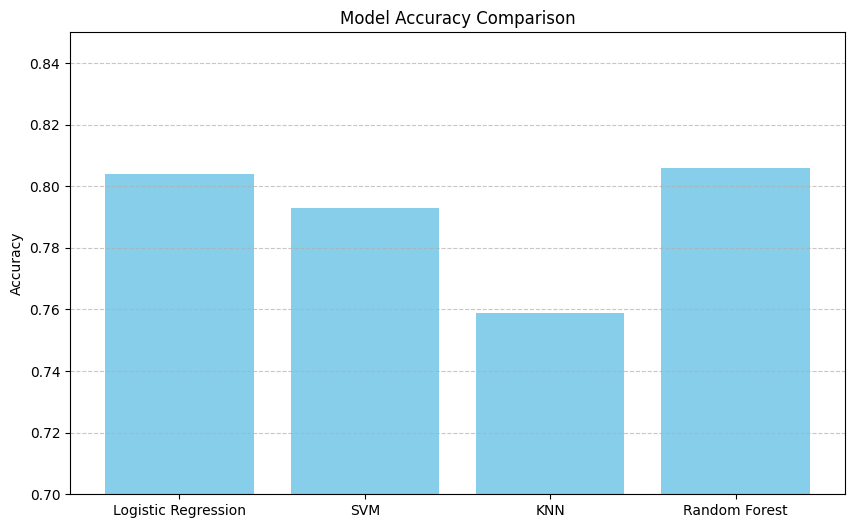

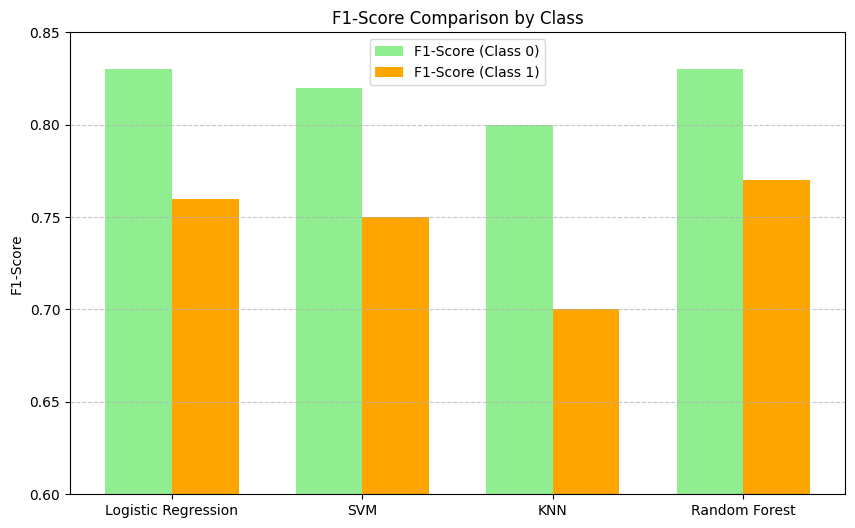

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Model names and their metrics
model_names = ['Logistic Regression', 'SVM', 'KNN', 'Random Forest']
accuracies = [0.804, 0.793, 0.759, 0.806]  # Accuracy for each model
f1_score_0 = [0.83, 0.82, 0.80, 0.83]      # F1-score for class 0 (Non-user)
f1_score_1 = [0.76, 0.75, 0.70, 0.77]      # F1-score for class 1 (User)
macro_avg_f1 = [0.80, 0.79, 0.75, 0.80]    # Average F1-score across both classes

# Create a DataFrame to display the results in a table
results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'F1-score (Class 0)': f1_score_0,
    'F1-score (Class 1)': f1_score_1,
    'Macro Avg F1': macro_avg_f1
})

# Print model performance table
print("Model Comparison Table")
print(results_df)

# Bar Chart – Accuracy
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.ylim(0.7, 0.85)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Bar Chart – F1-score by Class
x = range(len(model_names))
bar_width = 0.35

plt.figure(figsize=(10, 6))
plt.bar([i - bar_width/2 for i in x], f1_score_0, width=bar_width, label='F1-Score (Class 0)', color='lightgreen')
plt.bar([i + bar_width/2 for i in x], f1_score_1, width=bar_width, label='F1-Score (Class 1)', color='orange')

plt.xticks(ticks=x, labels=model_names)
plt.ylim(0.6, 0.85)
plt.title('F1-Score Comparison by Class')
plt.ylabel('F1-Score')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Chart: Model Accuracy**
This chart shows the proportion of correct predictions for each model:
- Random Forest had the best performance with 80.6% accuracy.
- Logistic Regression came close with 80.4% accuracy.
- SVM followed with 79.3%, also a very competitive result.
- KNN had the lowest accuracy at 75.9%.  

Interpretation: Although Random Forest achieved the highest score, the difference between it and Logistic Regression is very small (only 0.2%). Both models perform well, but Logistic Regression is simpler and faster to train, which can be a good trade-off in many cases.

**Chart: F1-Score by Class**
This chart evaluates how well each model balances precision and recall for each class:
- Class 0 (non-recent cannabis users): 
    All models performed well, with F1-scores above 0.80. 
    Random Forest and Logistic Regression reached the highest score of 0.83.
- Class 1 (recent cannabis users):
    Logistic Regression: 0.76
    Random Forest: 0.77
    SVM: 0.75
    KNN: 0.70 (the weakest for this class)

Interpretation: Class 1 is harder to classify because it has fewer samples (class imbalance).
KNN struggled the most, likely because it's more sensitive to noisy or imbalanced data.
Random Forest handled this class better due to its ensemble nature and robustness.



**4.1.3. Explain in your own words**  
**Why do you choose to use these metrics to evaluate and compare? Why not the other metrics?**  

We used Accuracy and F1-Score because:
- Accuracy shows how many predictions were correct overall.
- F1-Score is very useful when the classes are imbalanced (like ours), because it looks at both:
    Precision – how many predicted users were correct.
    Recall – how many real users the model actually found.  
        
Even though this is a binary classification problem, we didn’t use AUC/ROC because:
- We wanted to keep the evaluation simple and easy to understand.
- Accuracy and F1 already gave us a clear picture of how the models performed.

**Which model worked best? Why?**   
We chose Logistic Regression because it is a simple, fast, and easy-to-interpret model.  
Even though Random Forest had a slightly higher accuracy, Logistic Regression performed very well and is much faster to train. It's a great option when you want good results without high complexity.

#### 4.2. Pick one additional metric for each model   
- **This metric may not evaluate other models well, but can effectively represent the performance of that specific model.**   
- **Explain your choice and why does it represent the specific model’s performance better? Why not the other metrics?**

Additional Metric per Model – Specific to Each Algorithm

Besides using Accuracy and F1-Score for all models, I selected one **specific metric for each model** that best reflects its unique strengths. These metrics might not evaluate the other models well but are effective for these specific algorithms.

---

1. **Logistic Regression → ROC AUC**  
Logistic Regression provides probability scores for each class, not just predicted labels. The ROC AUC measures how well the model distinguishes between the two classes across all possible thresholds. It is a threshold-independent metric that is especially useful for binary classification tasks and is robust when there is class imbalance.
---

2. **Support Vector Machine (SVM) → Precision (Class 1)**  
SVM with a linear kernel is strict in defining class boundaries. Precision (Class 1) measures how many of the predicted positive cases are actually correct. This is useful to minimize false positives, which is critical when misclassifying a "user" could have serious implications.

---

3. **K-Nearest Neighbors (KNN) → Recall (Class 1)**  
KNN can struggle with minority classes. Recall (Class 1) measures how many actual users the model correctly identifies. This metric is chosen to ensure that KNN is not missing out on predicting positive cases (users) even if precision is lower.
---

4. **Random Forest → Feature Importance**  
Random Forest models are excellent at ranking which features are most influential in predictions. Feature importance helps explain which attributes (e.g., personality scores, age) have the strongest impact on predicting cannabis usage, providing valuable interpretability.



 Additional metric for each model:
AUC-ROC (Logistic Regression): 0.886
Precision - Class 1 (SVM): 0.760
Recall - Class 1 (KNN): 0.671


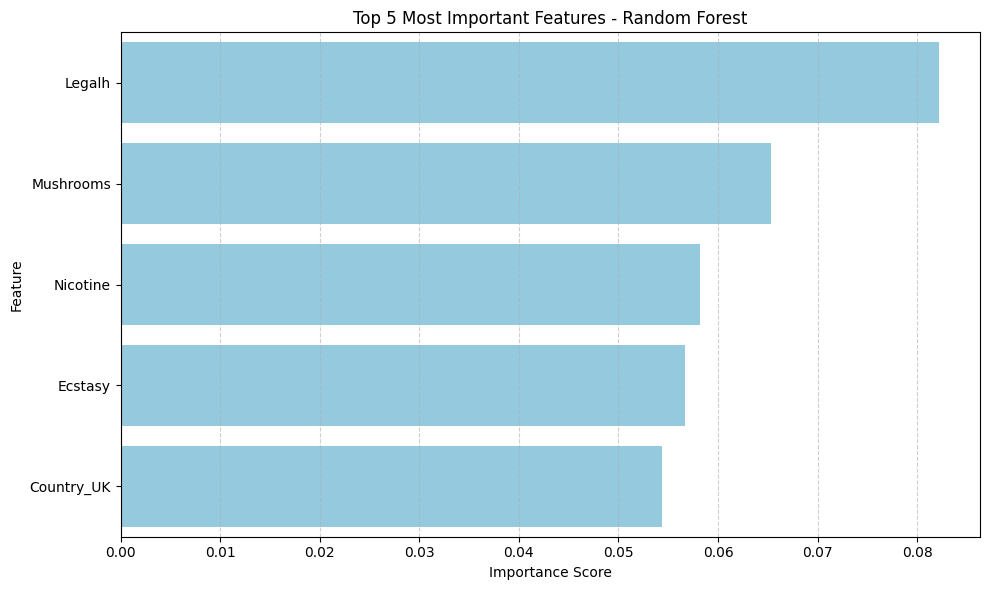

In [13]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
auc_roc_lr = roc_auc_score(y_test, lr.predict_proba(X_test_scaled)[:, 1])

# Support Vector Machine (SVM)
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
precision_svm = precision_score(y_test, y_pred_svm)

# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
recall_knn = recall_score(y_test, y_pred_knn)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
importances = rf.feature_importances_
top_features = sorted(zip(X.columns, importances), key=lambda x: x[1], reverse=True)[:5]

# Display additional metrics for each model
print("\n Additional metric for each model:")
print(f"AUC-ROC (Logistic Regression): {auc_roc_lr:.3f}")
print(f"Precision - Class 1 (SVM): {precision_svm:.3f}")
print(f"Recall - Class 1 (KNN): {recall_knn:.3f}")

# Plot Top 5 Most Important Features from Random Forest
plt.figure(figsize=(10, 6))
sns.barplot(x=[f[1] for f in top_features], y=[f[0] for f in top_features], color="skyblue")
plt.title('Top 5 Most Important Features - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
